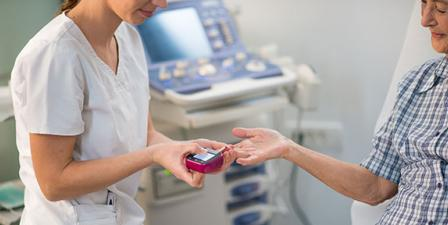

# Predicting Readmission of Diabetes Patients

In this project, we see if were are able to predict (at a rate better than purely random) the readmittance of diabetes patients given data both about the patient and the treatment the patient received.

The dataset we use is _Diabetes 130-US hospitals for years 1999-2008_, available in the Public Domain through [UCI's Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/diabetes+130-us+hospitals+for+years+1999-2008#) and [Kaggle](https://www.kaggle.com/brandao/diabetes). This dataset was first created for the open access journal article by Strack et al. ["Impact of HbA1c Measurement on Hospital Readmission Rates"](https://www.hindawi.com/journals/bmri/2014/781670), itself a subset of the Health Facts Database curated by the Cerner Corporation. The creation of this 100,000+ record dataset was a query of diabetes diagnoses among 74,000,000 visitation records meeting certain criteria (such as length of stay being 24 hours or greater, or laboratory examinations being performed on the patients). In the original paper, the authors found that simply *measuring* Hemoglobin A1c had a later reduction in readmittance. Here, we look to see if a further combination of features can be used to predict readmittance.

## Data Cleaning

In [1]:
import data_prep as d
import new_data_prep as nd

The functions below load and clean the data to put in a *structure* proper for the question we are asking and the supervised learning techniques we anticpate using.

In [2]:
X, y = d.clean_1_5()
X = d.clean_2_5(X)
X = d.clean_3_5(X)
X = d.clean_4_5(X)
X, y  = d.clean_5_5(X, y)

Upload
y_clean
column_drop
null_value_drop
x_clean
values_lower
column_lowercase



reset_indices


The next data prep function *formats* the data in a manner that it can be read by the supervised learning algorithms that are available to us.

In [4]:
X, y = nd.new_data_prep(X, y)

Previews of the data are available below.

In [5]:
X.head()

,female,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,...,glyburide_up,pioglitazone_down,pioglitazone_steady,pioglitazone_up,rosiglitazone_down,rosiglitazone_steady,rosiglitazone_up,insulin_down,insulin_steady,insulin_up
encounter_id,,,,,,,,,,,,,,,,,,,,,
12522,1,9,13,68,2,28,0,0,0,8,...,0,0,0,0,0,0,0,0,1,0
15738,1,10,12,33,3,18,0,0,0,8,...,0,0,0,0,0,1,0,0,1,0
16680,0,5,1,51,0,8,0,0,0,5,...,0,0,0,0,0,0,0,0,1,0
28236,1,5,9,47,2,17,0,0,0,9,...,0,0,0,0,0,0,0,0,1,0
35754,0,6,3,31,6,16,0,0,0,9,...,0,0,0,0,0,0,0,0,1,0


In [6]:
y.head()

encounter_id
12522    0
15738    0
16680    0
28236    1
35754    1
Name: readmitted, dtype: int64

## Data Splitting

Below we do a test-train-split of the data in anticipation of algorithms.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=22424)

The visualization below aids in visualizing the data that has been split.

In [8]:
import data_split_diagnostics as dsd

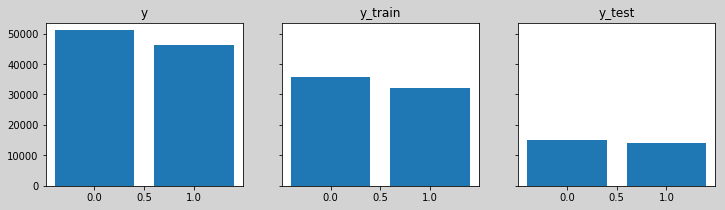

In [9]:
dsd.visualize_y(y, y_train, y_test)

Descriptive statistics for each feature across the split can similarly be seen below (uncomment the code).

In [10]:
#dsd.explore_x(X, X_train, X_test)

## Models

In [11]:
import model_assists
metric_dicts = {}

Below we look at how five different supervised learning techniques perform on the data, in addition to a baseline "dummy classifier". The techniques explored, accordingly, are (1) Decision Tree, (2) Random Forest, (3) Logisitic Regression, (4) K-Nearest Neighbors, and (5) XGBoost.

For each model, we show a confusion matrix alongside accuracy and F1 scores, and then a ROC curve alongside a AUC score. We throw each of these performance metrics into a dictionary for purposes of later comparison.

### Model #0 — Dummy Classifier

Our baseline model is a dummy classifier.

In [14]:
from sklearn.dummy import DummyClassifier

In [15]:
dummy = DummyClassifier(strategy='most_frequent', random_state=22424).fit(X_train, y_train)
y_pred = dummy.predict(X_test)

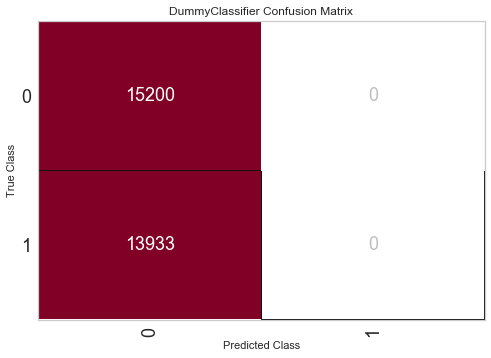

Accuracy: 0.5217


C:\Users\Kaleb\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


F1 Score: 0.0


In [16]:
model_assists.display_confusion_matrix(dummy, X_train, y_train, X_test, y_test, y_pred)

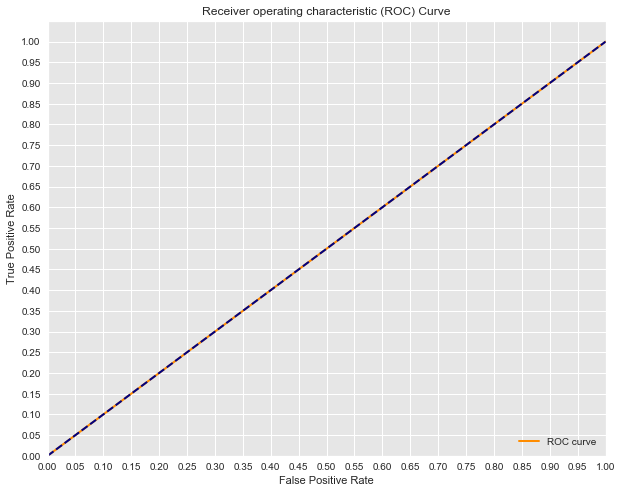

AUC (Area Under Curve): 0.5


In [17]:
model_assists.display_roc_curve(dummy, X_train, y_train, X_test, y_test)

In [18]:
performance_metrics = model_assists.metrics_to_metric_dictionary('Dummy', dummy, X_train, y_train, X_test, y_test, y_pred)
metric_dicts.update(performance_metrics)

C:\Users\Kaleb\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


----

### Model #1 ⁠— Decision Tree

Our first model is a decision tree.

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [155]:
decisiontree = DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features=25, random_state=22424)
decisiontree.fit(X_train,y_train)
y_pred = decisiontree.predict(X_test)

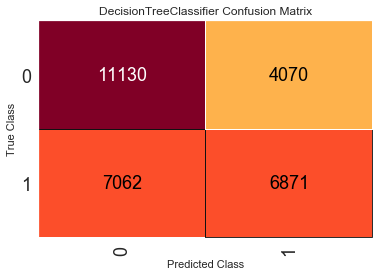

Accuracy: 0.6179
F1 Score: 0.5525


In [156]:
model_assists.display_confusion_matrix(decisiontree, X_train, y_train, X_test, y_test, y_pred)

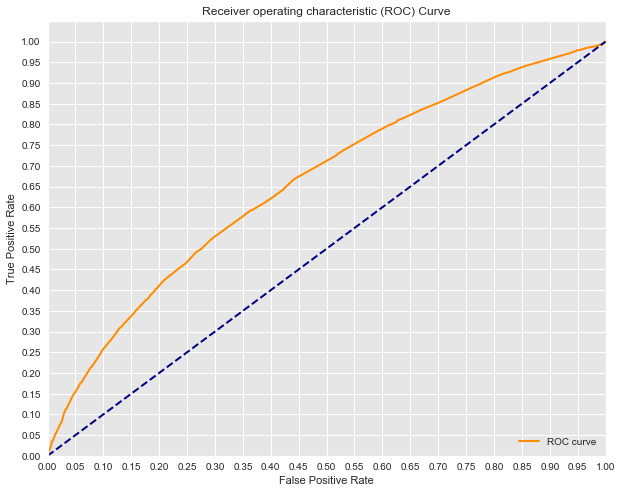

AUC (Area Under Curve): 0.6572


In [157]:
model_assists.display_roc_curve(decisiontree, X_train, y_train, X_test, y_test)

In [30]:
performance_metrics = model_assists.metrics_to_metric_dictionary('Decision Tree', decisiontree, X_train, y_train, X_test, y_test, y_pred)
metric_dicts.update(performance_metrics)

In [31]:
metric_dicts

{'Dummy': {'Accuracy': 0.5217451000583531,
  'F1 Score': 0.0,
  'AUC (Area Under Curve)': 0.5},
 'Decision Tree': {'Accuracy': 0.6180619915559674,
  'F1 Score': 0.5355040701314966,
  'AUC (Area Under Curve)': 0.6571253168358346}}

#### Peek at a sample decision tree

Since machine learning techniques usually have a "black box" characteristic where the logic of the computer is unintelligible to the human user, a decision tree is a good opportunity to look a bit inside the "black box".

In [32]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(837.0, 1426.95, 'number_inpatient <= 0.5\nentropy = 0.998\nsamples = 67975\nvalue = [35818, 32157]'),
 Text(418.5, 1019.25, 'number_diagnoses <= 5.5\nentropy = 0.967\nsamples = 45104\nvalue = [27328, 17776]'),
 Text(209.25, 611.55, 'age <= 6.5\nentropy = 0.885\nsamples = 10713\nvalue = [7466, 3247]'),
 Text(104.625, 203.8499999999999, 'entropy = 0.83\nsamples = 5064\nvalue = [3737, 1327]'),
 Text(313.875, 203.8499999999999, 'entropy = 0.925\nsamples = 5649\nvalue = [3729, 1920]'),
 Text(627.75, 611.55, 'number_emergency <= 0.5\nentropy = 0.983\nsamples = 34391\nvalue = [19862, 14529]'),
 Text(523.125, 203.8499999999999, 'entropy = 0.978\nsamples = 31753\nvalue = [18673, 13080]'),
 Text(732.375, 203.8499999999999, 'entropy = 0.993\nsamples = 2638\nvalue = [1189, 1449]'),
 Text(1255.5, 1019.25, 'number_inpatient <= 1.5\nentropy = 0.952\nsamples = 22871\nvalue = [8490, 14381]'),
 Text(1046.25, 611.55, 'number_outpatient <= 0.5\nentropy = 0.989\nsamples = 13098\nvalue = [5747, 7351]'

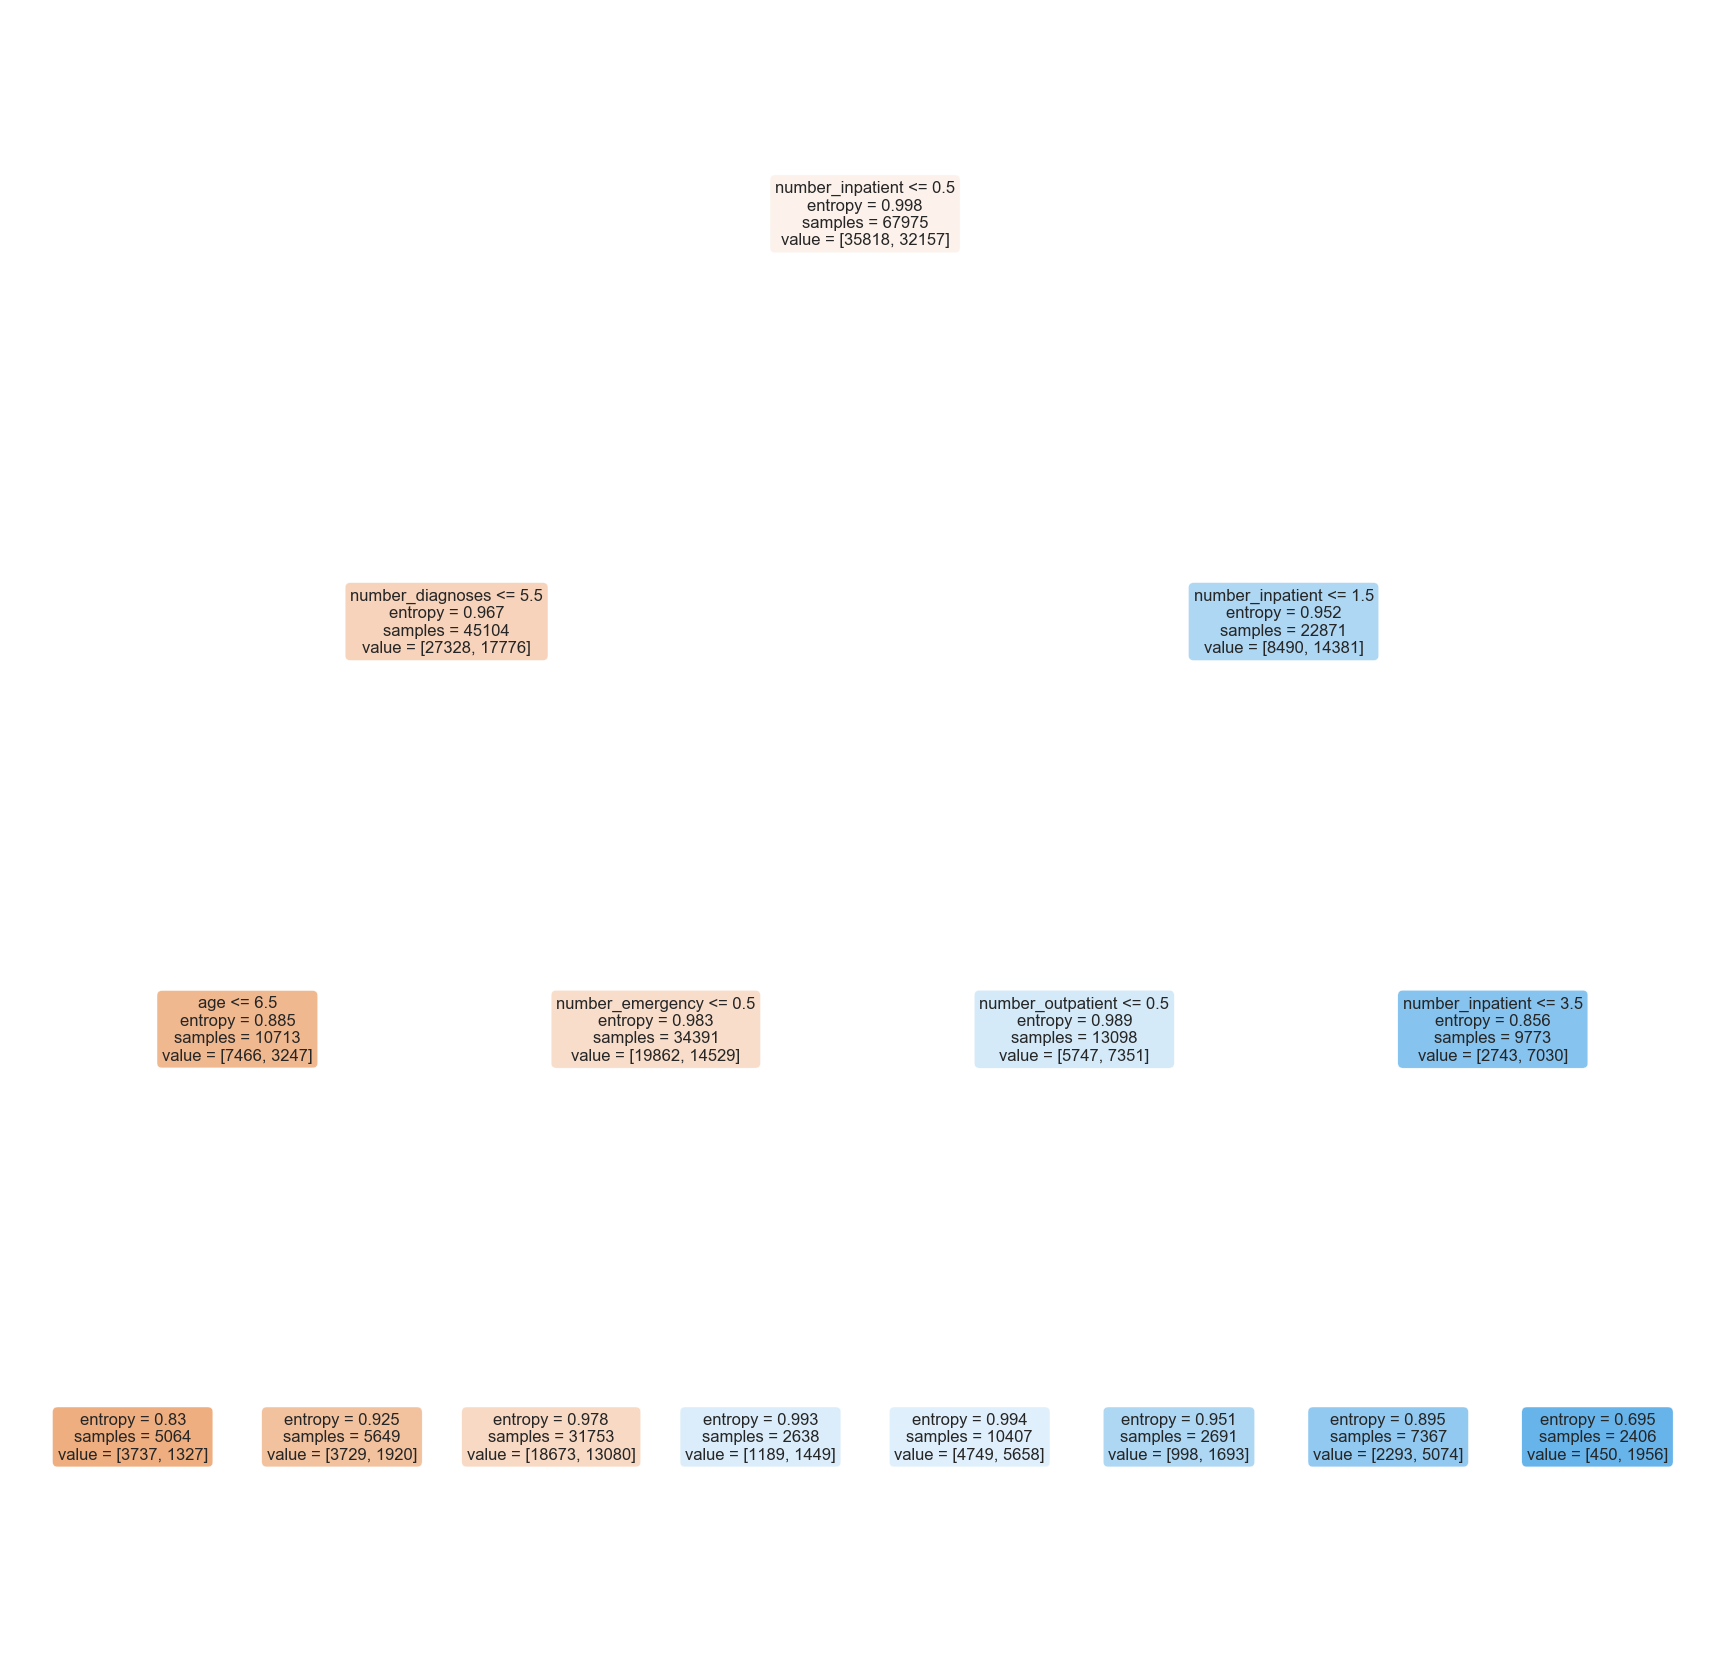

In [36]:
decisiontree = DecisionTreeClassifier(criterion='entropy', random_state=22424, max_depth=3)
decisiontree.fit(X_train,y_train)
plt.figure(figsize=(30,30))
tree.plot_tree(decisiontree, feature_names=X.columns, filled=True, rounded=True)

### Model #2 ⁠— Random Forest

Our second model is a random forest, an ensemble method of working with random trees.

In [158]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
forest = RandomForestClassifier(n_estimators=200, max_depth=10, max_features=25, random_state=22424)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test) 

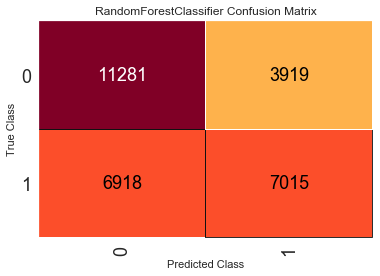

Accuracy: 0.628
F1 Score: 0.5642


In [159]:
model_assists.display_confusion_matrix(forest, X_train, y_train, X_test, y_test, y_pred)

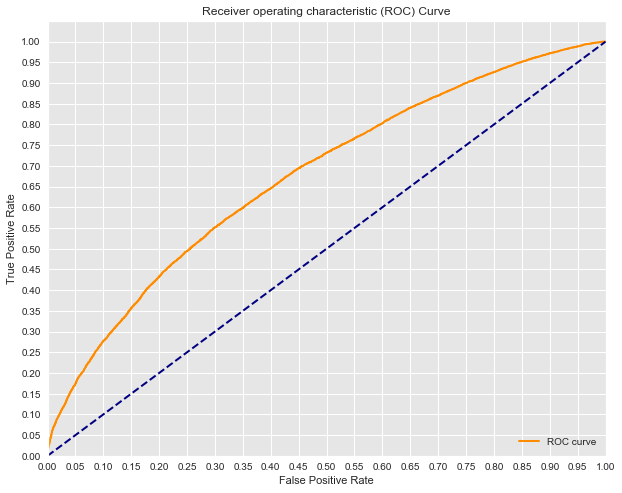

AUC (Area Under Curve): 0.6751


In [160]:
model_assists.display_roc_curve(forest, X_train, y_train, X_test, y_test)

In [40]:
performance_metrics = model_assists.metrics_to_metric_dictionary('Random Forest', forest, X_train, y_train, X_test, y_test, y_pred)
metric_dicts.update(performance_metrics)
metric_dicts

{'Dummy': {'Accuracy': 0.5217451000583531,
  'F1 Score': 0.0,
  'AUC (Area Under Curve)': 0.5},
 'Decision Tree': {'Accuracy': 0.6180619915559674,
  'F1 Score': 0.5355040701314966,
  'AUC (Area Under Curve)': 0.6571253168358346},
 'Random Forest': {'Accuracy': 0.6178217142072564,
  'F1 Score': 0.5730500805276477,
  'AUC (Area Under Curve)': 0.6625427445066049}}

----

### Model #3 ⁠— Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

In [59]:
logreg = LogisticRegression(solver='lbfgs')
model = logreg.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Kaleb\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


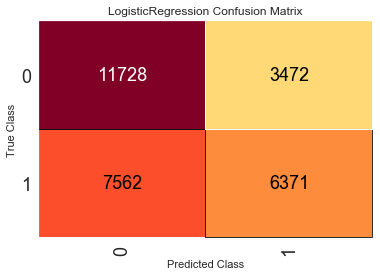

Accuracy: 0.6213
F1 Score: 0.5359


In [64]:
model_assists.display_confusion_matrix(logreg, X_train, y_train, X_test, y_test, y_pred)

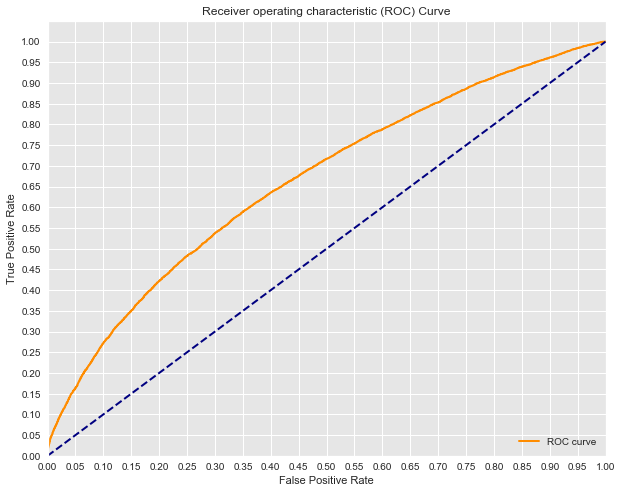

AUC (Area Under Curve): 0.6637


In [65]:
model_assists.display_roc_curve(logreg_model, X_train, y_train, X_test, y_test)

In [129]:
X.columns

Index(['female', 'age', 'time_in_hospital', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses', 'change',
       'diabetesmed', 'icd_1', 'icd_2', 'icd_3', 'icd_4', 'icd_5', 'icd_6',
       'icd_7', 'icd_8', 'icd_9', 'icd_10', 'icd_11', 'icd_12', 'icd_13',
       'icd_14', 'icd_15', 'icd_16', 'icd_17', 'icd_18', 'icd_19', 'num_meds',
       'num_down', 'num_up', 'african_american', 'asian', 'hispanic', 'other',
       'glu_200_300', 'glu_over_300', 'glu_norm', 'a1_7_8', 'a1_norm',
       'al_over_8', 'metformin_down', 'metformin_steady', 'metformin_up',
       'repaglinide_down', 'repaglinide_steady', 'repaglinide_up',
       'glimepiride_down', 'glimepiride_steady', 'glimepiride_up',
       'glipizide_down', 'glipizide_steady', 'glipizide_up', 'glyburide_down',
       'glyburide_steady', 'glyburide_up', 'pioglitazone_down',
       'pioglitazone_steady', 'pioglitazone_up', 'rosiglitazon

In [146]:
coefficients = list(zip(X.columns, list(logreg.coef_[0])))
coefficients[0:5]

[('female', 0.07730388607130355),
 ('age', 0.00043421697417097465),
 ('time_in_hospital', 0.006343481781442906),
 ('num_lab_procedures', 0.0022352382077772156),
 ('num_procedures', -0.0644194937342349)]

In [147]:
performance_metrics = model_assists.metrics_to_metric_dictionary('Logistic Regression', logreg_model, X_train, y_train, X_test, y_test, y_pred)
metric_dicts.update(performance_metrics)
metric_dicts

{'Dummy': {'Accuracy': 0.5217451000583531,
  'F1 Score': 0.0,
  'AUC (Area Under Curve)': 0.5},
 'Decision Tree': {'Accuracy': 0.6180619915559674,
  'F1 Score': 0.5355040701314966,
  'AUC (Area Under Curve)': 0.6571253168358346},
 'Random Forest': {'Accuracy': 0.6178217142072564,
  'F1 Score': 0.5730500805276477,
  'AUC (Area Under Curve)': 0.6625427445066049},
 'Logistic Regression': {'Accuracy': 0.6289431229190265,
  'F1 Score': 0.5623481781376518,
  'AUC (Area Under Curve)': 0.6637138684380512},
 'K-Nearest Neighbors': {'Accuracy': 0.5886451790066248,
  'F1 Score': 0.4895212131538592,
  'AUC (Area Under Curve)': 0.6276790689087248},
 'XGBoost': {'Accuracy': 0.6289431229190265,
  'F1 Score': 0.5623481781376518,
  'AUC (Area Under Curve)': 0.6766593226229285}}

----

### Model #4 ⁠— K-Nearest Neighbors

In [66]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

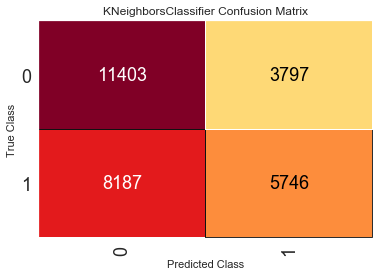

Accuracy: 0.5886
F1 Score: 0.4895


In [67]:
model_assists.display_confusion_matrix(knn, X_train, y_train, X_test, y_test, y_pred)

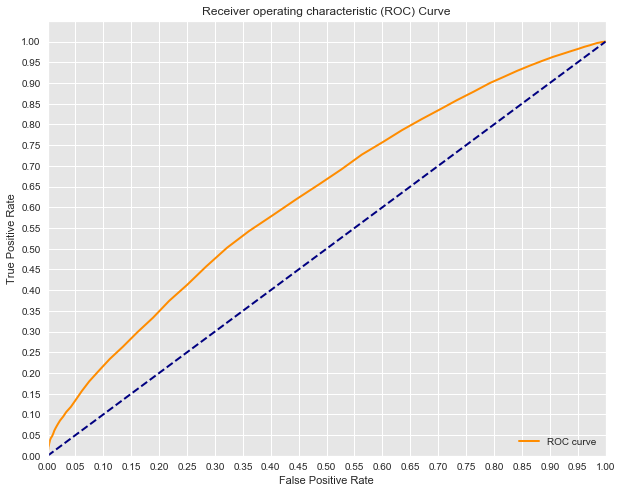

AUC (Area Under Curve): 0.6277


In [68]:
model_assists.display_roc_curve(knn, X_train, y_train, X_test, y_test)

In [70]:
performance_metrics = model_assists.metrics_to_metric_dictionary('K-Nearest Neighbors', knn, X_train, y_train, X_test, y_test, y_pred)
metric_dicts.update(performance_metrics)
metric_dicts

{'Dummy': {'Accuracy': 0.5217451000583531,
  'F1 Score': 0.0,
  'AUC (Area Under Curve)': 0.5},
 'Decision Tree': {'Accuracy': 0.6180619915559674,
  'F1 Score': 0.5355040701314966,
  'AUC (Area Under Curve)': 0.6571253168358346},
 'Random Forest': {'Accuracy': 0.6178217142072564,
  'F1 Score': 0.5730500805276477,
  'AUC (Area Under Curve)': 0.6625427445066049},
 'Logistic Regression': {'Accuracy': 0.6212542477602718,
  'F1 Score': 0.5359185733512787,
  'AUC (Area Under Curve)': 0.6637138684380512},
 'K-Nearest Neighbors': {'Accuracy': 0.5886451790066248,
  'F1 Score': 0.4895212131538592,
  'AUC (Area Under Curve)': 0.6276790689087248}}

----

### Model #5 ⁠— XGBoost

In [71]:
import xgboost as xgb
xgboost = xgb.XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

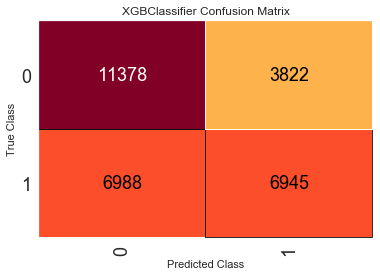

Accuracy: 0.6289
F1 Score: 0.5623


In [72]:
model_assists.display_confusion_matrix(xgboost, X_train, y_train, X_test, y_test, y_pred)

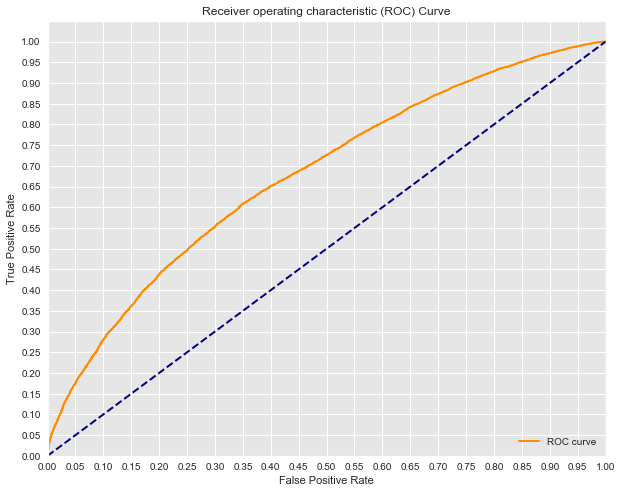

AUC (Area Under Curve): 0.6767


In [73]:
model_assists.display_roc_curve(xgboost, X_train, y_train, X_test, y_test)

In [74]:
performance_metrics = model_assists.metrics_to_metric_dictionary('XGBoost', xgboost, X_train, y_train, X_test, y_test, y_pred)
metric_dicts.update(performance_metrics)
metric_dicts

{'Dummy': {'Accuracy': 0.5217451000583531,
  'F1 Score': 0.0,
  'AUC (Area Under Curve)': 0.5},
 'Decision Tree': {'Accuracy': 0.6180619915559674,
  'F1 Score': 0.5355040701314966,
  'AUC (Area Under Curve)': 0.6571253168358346},
 'Random Forest': {'Accuracy': 0.6178217142072564,
  'F1 Score': 0.5730500805276477,
  'AUC (Area Under Curve)': 0.6625427445066049},
 'Logistic Regression': {'Accuracy': 0.6212542477602718,
  'F1 Score': 0.5359185733512787,
  'AUC (Area Under Curve)': 0.6637138684380512},
 'K-Nearest Neighbors': {'Accuracy': 0.5886451790066248,
  'F1 Score': 0.4895212131538592,
  'AUC (Area Under Curve)': 0.6276790689087248},
 'XGBoost': {'Accuracy': 0.6289431229190265,
  'F1 Score': 0.5623481781376518,
  'AUC (Area Under Curve)': 0.6766593226229285}}

## Display performance metrics

In [152]:
import comparison_chart
import importlib
importlib.reload(comparison_chart)

<module 'comparison_chart' from 'C:\\Users\\Kaleb\\Box\\GitHub\\Hospital_Readmittance_Rates_Diabetes\\comparison_chart.py'>

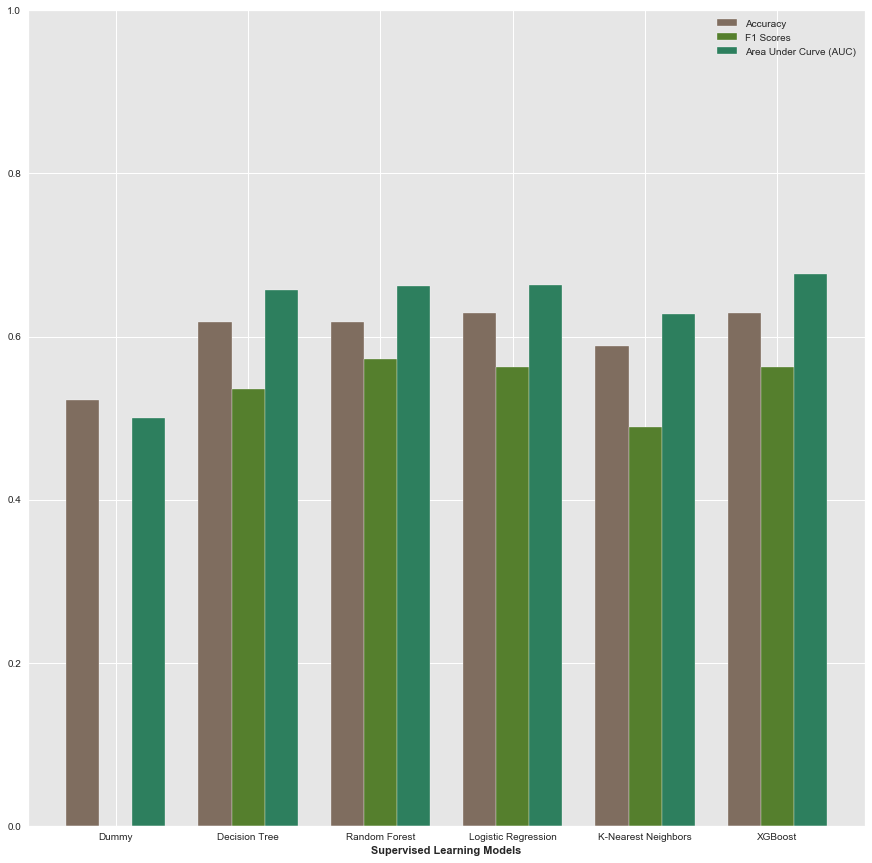

In [153]:
comparison_chart.performance_metric_chart(metric_dicts)